In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# one hot encoding our dataframe
insurance_one_hot = pd.get_dummies(insurance_df)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# creating features and labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
# creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # setting random seed to reproduce results

In [23]:
# building a neural network
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # hidden layer with 10 neurons
  tf.keras.layers.Dense(1) # output layer
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

history_1 = insurance_model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'Epochs')

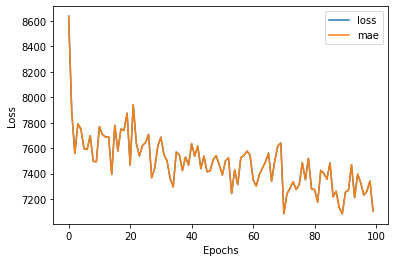

In [35]:
# plotting loss/trainig curve
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Trying to improve the model
**Expeiment 1:**Adding an extra hidden layer with more neurons and using Adam optimizer instead of SGD.

In [25]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'Epochs')

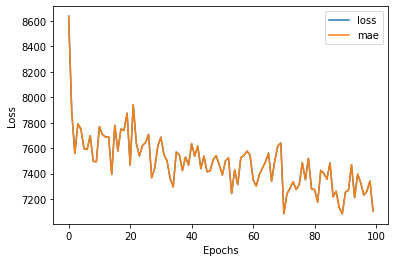

In [30]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [18]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Text(0.5, 0, 'Epochs')

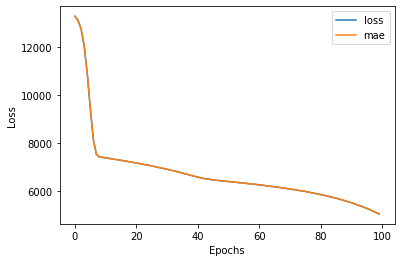

In [28]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

**Expeiment 2:**Training the model for longer(incresing epochs).

In [33]:
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_3 = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [20]:
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'Epochs')

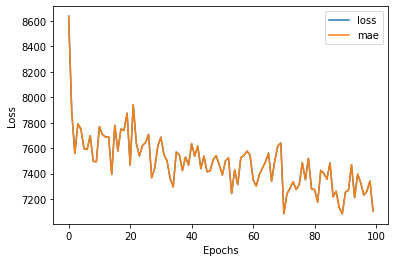

In [31]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [21]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Text(0.5, 0, 'Epochs')

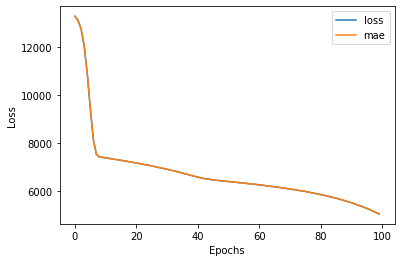

In [32]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [22]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3479.7764 - mae: 3479.7764


[3479.7763671875, 3479.7763671875]

Text(0.5, 0, 'Epochs')

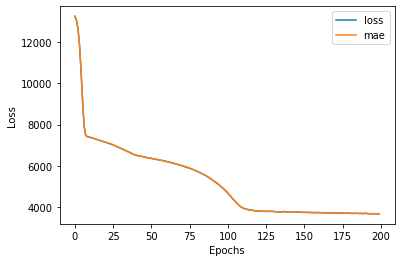

In [34]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Therefore model 3 gives the best results